In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from scipy import stats
import pickle

In [2]:
ss = StandardScaler()

In [3]:
original_df = pd.read_csv('Dataset.csv')

In [4]:
working_df = original_df.copy()

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
working_df = working_df.select_dtypes(exclude = 'object')

In [7]:
x = working_df.drop('target', axis = 1)
y = working_df['target']

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 24)

In [9]:
train_data = pd.merge(x_train, y_train, left_index=True, right_index=True)

In [10]:
train_data.describe()

,x1,x2,x3,x4,x5,target
count,800.000000,800.000000,800.000000,800.000000,800.000000,8.000000e+02
mean,0.507500,59.182500,4.358120,-315.014582,-58299.139078,-1.715339e+12
std,0.500257,27.653935,4.282077,243.953577,49147.831782,2.763215e+12
min,0.000000,13.000000,0.000295,-1061.535764,-206202.370241,-2.387319e+13
25%,0.000000,35.000000,1.267015,-487.003424,-92889.871983,-2.305132e+12
50%,1.000000,59.000000,3.084938,-316.939652,-58430.096603,-6.353696e+11
75%,1.000000,84.000000,5.978615,-161.551053,-28072.183638,-8.408618e+10
max,1.000000,106.000000,26.080670,389.838779,83965.659722,1.182540e+12


(array([  1.,   2.,   4.,   0.,   5.,   7.,  33.,  59., 175., 514.]),
 array([-2.38731910e+13, -2.13676179e+13, -1.88620448e+13, -1.63564717e+13,
        -1.38508986e+13, -1.13453256e+13, -8.83975248e+12, -6.33417940e+12,
        -3.82860632e+12, -1.32303324e+12,  1.18253985e+12]),
 <a list of 10 Patch objects>)

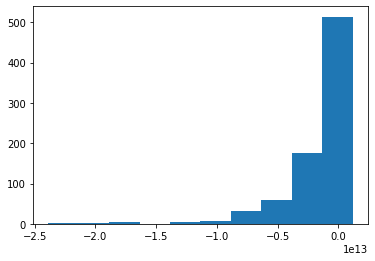

In [11]:
plt.hist(train_data.target)

In [12]:
train_data.shape

(800, 6)

In [13]:
train_data.dropna(inplace=True)

In [14]:
train_data.shape

(800, 6)

In [15]:
features = pd.DataFrame(ss.fit_transform(train_data.drop('target', axis = 1)))
features.columns = x_train.columns
features.index = x_train.index
features.head()


,x1,x2,x3,x4,x5
901,0.985111,-0.368442,-0.200523,-0.639232,-0.658641
803,-1.015114,-0.549361,-0.053360,-0.339579,-0.334722
855,-1.015114,-0.332258,2.421243,-0.386268,-0.134474
392,0.985111,-0.657913,-0.985804,-0.300833,-0.401899
881,-1.015114,1.404566,-0.172189,-0.927547,-0.946057


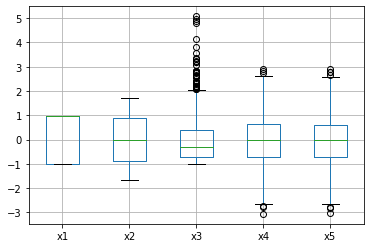

In [16]:
features.boxplot()

In [17]:
with open('scaler.p', 'wb') as write_file:
    pickle.dump(ss, write_file)

In [18]:
standard = pd.merge(features, train_data['target'], left_index=True, right_index=True)
standard.head()

,x1,x2,x3,x4,x5,target
901,0.985111,-0.368442,-0.200523,-0.639232,-0.658641,-2.083417e+12
803,-1.015114,-0.549361,-0.053360,-0.339579,-0.334722,-1.256338e+12
855,-1.015114,-0.332258,2.421243,-0.386268,-0.134474,-1.367294e+12
392,0.985111,-0.657913,-0.985804,-0.300833,-0.401899,-1.168949e+12
881,-1.015114,1.404566,-0.172189,-0.927547,-0.946057,-3.162600e+12


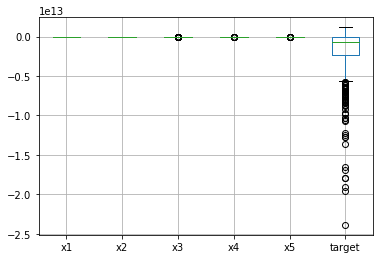

In [19]:
standard.boxplot()

In [20]:
standard = standard[(np.abs(stats.zscore(standard)) < 3).all(axis=1)]

In [21]:
standard.shape

(771, 6)

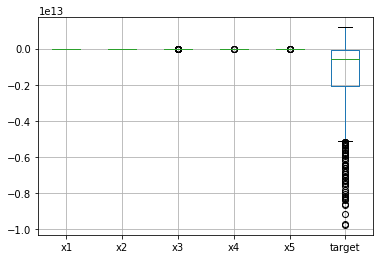

In [22]:
standard.boxplot()

In [23]:
y_train = standard['target']
x_train = standard.drop('target', axis=1)

In [24]:
lm = LinearRegression()
lm.fit(x_train, y_train)

lm.coef_

pd.DataFrame(lm.coef_).set_index(x_train.columns)

,0
x1,-4.080771e+10
x2,-2.575671e+10
x3,4.839694e+10
x4,2.149417e+12
x5,-4.305956e+11


In [25]:
y_hat = lm.predict(x_train)
lm.score(x_train, y_train)

0.7003123377536358

In [26]:
from sklearn.metrics import mean_squared_error, r2_score

In [32]:
y_train_hat.shape

(771,)

In [30]:
x_train.shape

(771, 5)

In [27]:
y_train_hat = lm.predict(x_train)
r2_score(y_train, y_train_hat)

0.7003123377536358

In [28]:
mse = mean_squared_error(y_train, y_train_hat)
mse

1.1406709648847556e+24

In [29]:
rmse = np.sqrt(mse)
rmse

1068021987079.2715